In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [4]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/qna_for_git.csv', index_col=0)

# df.head()

In [5]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [6]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [7]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [8]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [9]:
# train_data[:5] # 상위 5개 출력

In [11]:
# test_data[:5] # 상위 5개 출력

In [12]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [ ]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # inquiry 열에서 중복인 내용이 있다면 중복 제거

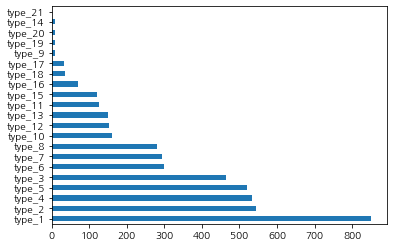

In [13]:
train_data['sub_type'].value_counts().plot(kind='barh')

In [14]:
print(train_data.groupby('sub_type').size().reset_index(name='count'))

   sub_type  count
0    type_1    849
1   type_10    160
2   type_11    125
3   type_12    153
4   type_13    150
5   type_14      8
6   type_15    121
7   type_16     70
8   type_17     34
9   type_18     36
10  type_19      8
11   type_2    545
12  type_20      8
13  type_21      2
14   type_3    464
15   type_4    532
16   type_5    521
17   type_6    300
18   type_7    293
19   type_8    280
20   type_9      9


In [15]:
print(test_data.groupby('sub_type').size().reset_index(name='count'))

   sub_type  count
0    type_1    209
1   type_10     20
2   type_11     33
3   type_12     37
4   type_13     49
5   type_14      5
6   type_15     21
7   type_16     20
8   type_17     12
9   type_18     12
10  type_19      2
11   type_2    130
12  type_20      2
13  type_21      2
14   type_3    119
15   type_4    140
16   type_5    121
17   type_6     89
18   type_7     75
19   type_8     68
20   type_9      2


In [16]:
print(train_data.isnull().values.any())

False


In [17]:
train_data = train_data.dropna(how='any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


## 토크나이저를 이용한 정수 인코딩

In [18]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 101 kB 10.0 MB/s 
     |████████████████████████████████| 6.6 MB 39.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [19]:
import transformers

In [20]:
transformers.__version__

'4.20.1'

In [21]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [22]:
test_data = test_data.dropna(how='any')

In [23]:
print(len(test_data))

1168


In [24]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [25]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [26]:
# print(X_train[0].tokens)

In [27]:
print(X_train[0].ids)

[2, 9926, 4318, 3915, 6233, 1506, 2372, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


type_ids는 지금 풀고자 하는 문제에서 문장의 종류의 개수를 의미하는데, 일반적으로 두 개 이상의 문장을 가지고 푸는 문제일 경우에는 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제라서 [0, 0, 0, 0, 0, 0, 0, 0]이 들어간다.

In [29]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 데이터셋 생성 및 모델 학습

In [30]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [31]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
# loss = 'categorical_crossentropy' 는 원핫 인코딩
# loss = 'sparse_categorical_crossentropy' 는 정수 인코딩

In [33]:
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
model.compute_loss

<bound method TFPreTrainedModel.compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x7f42d940fd90>>

In [35]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)
model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)

Epoch 1/5


UnimplementedError: ignored

In [ ]:
model.evaluate(val_dataset.batch(1024))